## An exploratory analysis from a simulated dataset of customer purchase behavior

- Some points I am interested in exploring:

1) the relationship between the audience age, gender, income, education, region and the product category

2) the same relationship but based on purchase frequency

3) the relation between loyalty status of the customer and the purchase amount

4) examine the degree of customer loyalty compared to their satisfaction score


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
# reading the .csv file
data_customer = pd.read_csv('customer_data.csv')

In [26]:
data_customer.head(10)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5
5,6,38,Male,7347,Bachelor,South,Silver,occasional,2822,Electronics,0,5
6,7,32,Female,8265,Bachelor,South,Silver,frequent,3293,Clothing,0,7
7,8,24,Female,47773,HighSchool,North,Regular,rare,21794,Books,0,5
8,9,27,Male,19154,College,East,Regular,occasional,5819,Clothing,0,5
9,10,28,Female,24666,HighSchool,North,Regular,rare,8779,Food,0,6


In [27]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [28]:
data_customer.shape

(100000, 12)

In [29]:
# checking if there is null data
data_customer.isna().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [30]:
data_customer.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


### The dataset is okay, so far, so let's dive into the analysis!

In [50]:
# I will start by listing the characteristics of the users and the main categories of products requested
data_customer['product_category'].value_counts()
product_category_counting = data_customer['product_category'].value_counts().reset_index()
product_category_counting.columns = ['product_category', 'counting']

In [51]:
product_category_counting

,product_category,counting
0,Electronics,30027
1,Clothing,19989
2,Books,14925
3,Food,14822
4,Health,10123
5,Home,5079
6,Beauty,5035


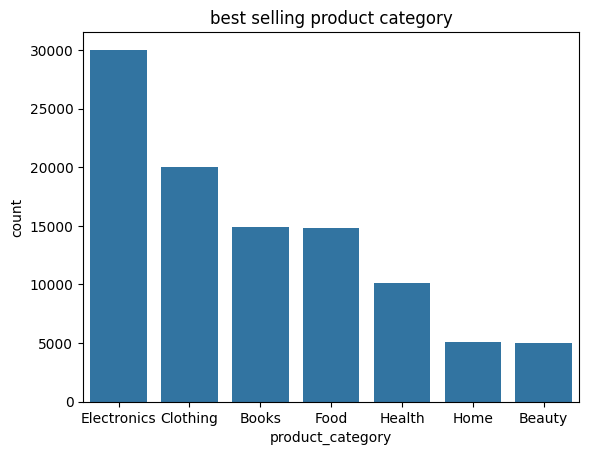

In [54]:
# Creating a barplot
sns.barplot(x=product_category_counting['product_category'], y=product_category_counting['counting'])

# Adding labels and titles
plt.xlabel('product_category')
plt.ylabel('count')
plt.title('best selling product category')

# Showing the plot
plt.show()


- Okay, this is interesting, Electronics is the top selling product category, followed by Clothing, Books and Food. This gives us an initial observation, but we still need to investigate the profile of our target customer!

In [59]:
# starting with our customer average age 
data_customer['age'].mean()


np.float64(30.00326)

In [60]:
data_customer['age'].value_counts()

age
30    8867
31    8645
29    8636
28    8266
32    8034
33    7214
27    7022
34    5894
26    5882
35    4873
25    4856
36    3583
24    3576
37    2697
23    2636
38    1791
22    1790
39    1200
21    1187
20     743
40     682
41     481
19     457
42     242
18     233
17     143
43     125
16      66
44      58
15      39
45      35
47      13
14      13
46      11
13       4
12       3
48       2
49       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Variable distribution age')

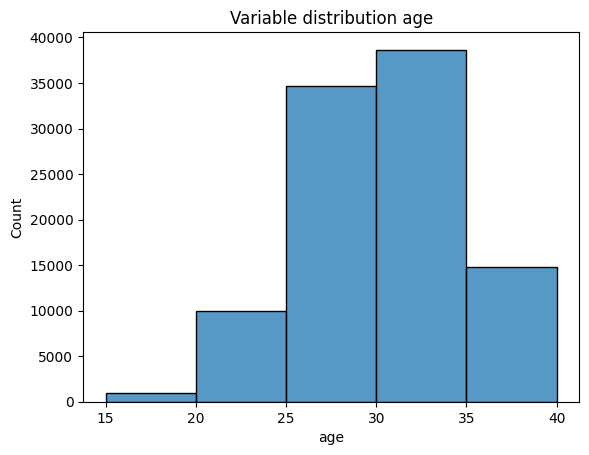

In [85]:
#Showing the plot
col = 'age'
sns.histplot(data=data_customer, x='age', bins=range(15, 45, 5), kde=False, ).set_title(f'Variable distribution {col}')

## So, we have that the average age of our customers is around 30-35 years